# Exercise N - Processing spectral data
*Andrew Valentine - andrew.valentine@anu.edu.au - With thanks to Dr Penny King*

In [1]:
%matplotlib inline
import spectroscopy

The file `11octrll32bpanel1s1_2016-10-11T12-48-25.asp` is produced by an infrared spectrometer. You can look at the file contents by clicking its name in the Jupyter tree browser. The file format is as follows:

- Line 1: Number of data points in file
- Line 2: Wavenumber associated with first measurement in file
- Line 3: Wavenumber associated with last measurement in file
- Line 4-6: Miscellaneous information
- Line 7-end: Reflectance measurements.

You can assume that the measurements are evenly-spaced in wavenumber.

The filename encodes some additional information, in the form:

`<date><location>panel<panelnumber>s<samplenumber>_<date>T<time>.asp`

**&#10148; Write your own code to read in this file, and generate the following figure.**

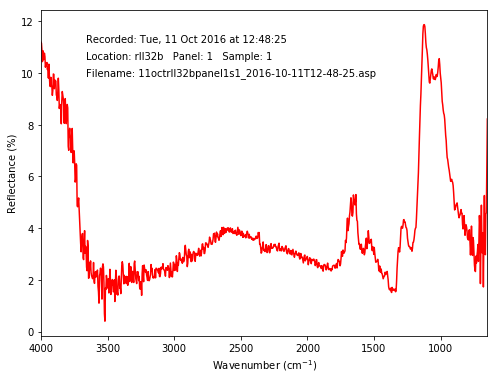

In [2]:
filename = "11octrll32bpanel1s1_2016-10-11T12-48-25.asp"
fmin,fmax,npts,data = spectroscopy.loadSpectralData(filename)
spectroscopy.plotSpectralData(fmin,fmax,npts,data,filename)

In [3]:
# Try it here!


You will notice that the spectrum is rather jagged, probably due to noise in the measurements. A 'moving-window filter' replaces each data point with the average over a small number of adjacent data points. 

**&#10148; Add this functionality to your code, as in the following figure:**

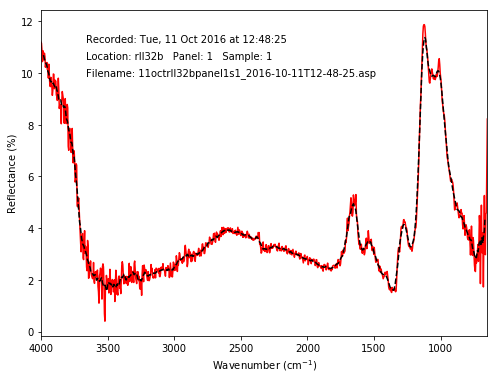

In [4]:
filename = "11octrll32bpanel1s1_2016-10-11T12-48-25.asp"
fmin,fmax,npts,data = spectroscopy.loadSpectralData(filename)
spectroscopy.plotSpectralData(fmin,fmax,npts,data,filename,window=5)

In [5]:
# Try it here!


You can notice that some portion of the spectra are rather devoid of signal (e.g. between 1900 and 2400 cm$^{-1}$). It is very common to fit a baseline to those portion, in order to get a flat signal that can be further analysed. A common way is to use a polynomial function, and to fit it to portions of spectra devoid of signal. 

In the present case, we would like to analyze the peaks between 1300 and 2000 cm$^{-1}$. We first need to grab this portion of the signal. Tpo do that, you will need to reconstruct the x axis (wavenumber) and select the Reflectance accordingly.

**&#10148; Add this functionality to your code, as in the following figure:**

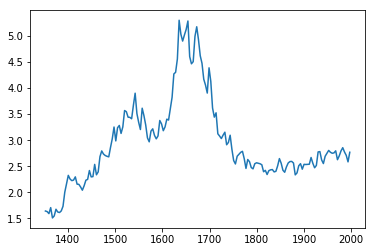

In [6]:
low_cut = 1350.
high_cut = 2000.

x, y = spectroscopy.cutPortion(fmin,fmax,npts,data,low_cut,high_cut)

We now want to fit a linear background that fits the first points between 1350 and 1360 cm$^{-1}$, and the portion between 1900 and 2000 cm$^{-1}$. This is a simple least-square problem, which can be solved with using the numpy.polyfit() function. First, we grab the appropriate regions of spectra in a numpy array, and then solve the problem for a polynomial function of order 1. Once it is fit to the data, we can subtract the baseline and get a baseline-corrected sample

**&#10148; Add this functionality to your code, as in the following figure:**

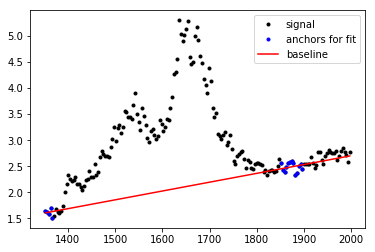

In [7]:
roi = [1350.,1370.,1850.,1900.] # this is a list containing the frequencies to cut the signal in the region of interests
bkg = spectroscopy.fitBackground(x,y,roi)
y_corr = y - bkg

Now, we would like to measure the area under this curve. A common way of doing that is to use trapezoidal integration.

**&#10148; Add this functionality to your code, to reach the following result:**

In [8]:
spectroscopy.trapz(x[::-1],y_corr[::-1])

510.8511990075001

Note that if you provide x as decreasing values, the trapz() output will be negative. 

We can compare that with numpy calculation:

In [9]:
import numpy as np
np.trapz(y_corr[::-1],x[::-1])

510.8511990075001

It is possible to model the background corrected signal with the sum of two gaussian peaks and a lorentzian peak.

The formula for those peak shapes are:

$$gaussian(x) = A \times exp(-log(2) \times \frac{(x-position)^2}{HWHM^2})$$

and 

$$lorentzian(x) = \frac{A}{(1 + \frac{(x-position)^2}{HWHM^2})}$$

with A the amplitude, position the peak wavenumber, and HWHM the peak half-width at half maximum.

It is possible to write a function for the model, and adjust the peak parameters with the scipy.optimize.curve_fit function which performs a least square fit.

**&#10148; Create the model function and adjust its parameters to fit the signal with the sum of two gaussian peaks and a lorentzian peak**

Use the help of scipy.optimize.curve_fit to implement the fit and reproduce the plot below.

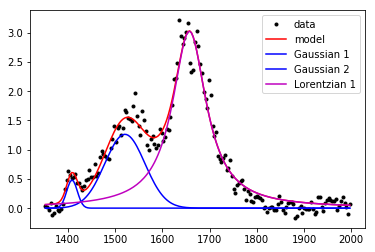

In [10]:
spectroscopy.fitSignal(x,y_corr)